In [13]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [14]:
import zipfile
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf

with zipfile.ZipFile("Path2.zip", 'r') as zip_ref:
        zip_ref.extractall('.')

2024-04-05 18:51:00.608872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


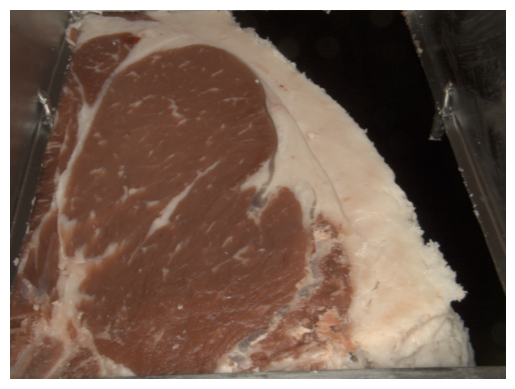

In [15]:
# Load the image
image_path = "./Path2/Path2-Model Training/Path2 Training Images/00001273-2.tif"
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the Excel file
xlsx_file = "./Path2/Path2-Model Training/Path2 Data.xlsx"
df = pd.read_excel(xlsx_file)

# Extract features and targets
features = df[['Ribeye (sq inches)', 'FatThickness, inches']].values
targets = df['Carcass ID'].values

# Split dataset into training and validation sets
train_features, val_features, train_targets, val_targets = train_test_split(features, targets, test_size=0.2, random_state=42)

# Print shapes to verify
print("Training Features shape:", train_features.shape)
print("Training Targets shape:", train_targets.shape)
print("Validation Features shape:", val_features.shape)
print("Validation Targets shape:", val_targets.shape)


Training Features shape: (32, 2)
Training Targets shape: (32,)
Validation Features shape: (8, 2)
Validation Targets shape: (8,)


In [17]:
df.head()

,Carcass ID,Ribeye (sq inches),"FatThickness, inches"
0,1273,15.7,0.88
1,1274,16.4,0.76
2,1275,13.2,0.88
3,1276,16.7,0.92
4,1277,17.4,0.68


In [18]:
def create_model(input_shape=(768, 572, 3)):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2)  # Output layer with 2 neurons
    ])
    return model

model = create_model()

# Compile the model
model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error loss
              metrics=['mae'])  # Mean Absolute Error metric

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 766, 570, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 383, 285, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 381, 283, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 190, 141, 64)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1714560)           0         
                                                                 
 dense (Dense)               (None, 128)               2

2024-04-05 18:51:05.924701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-05 18:51:05.932050: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-05 18:51:05.932207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
# Step 5: Train your model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)